# Stock Prices Forecasting Model

The problem that I want to solve is to identify patterns in the movement of stock prices so that I could quickly spot opportunities to replicate the past behaviour. 

What do I understant so far about Machine Learning

1. It tries to define a mathematical model between the data that we know or we have easily and some valuable informations. This implies our need as a humans to explain the world around us
2. The objective of the mathematical model can be a classification (binary or multiclass) or regression
3. The strategy is that we assume that the features we have as input can be layered in such a way that they can lead to the dependent variable
4. Nb #3 leads me to start by saying that we assume a causality and then we search for the mathematical model that describes the causality
5. The problems that we try to solve range from easy to hard. 
6. Examples that can be taken individually and reason about individually can be solved by various algorithms: linear regression, logistic regression, decision tree, support vector machines, k-Nearest Neighbour
7. Neural Networks imply a sequence of neurons, each neuron computing a value based on the inputs and bias (personal) and then applying an activation function that defines the degree to which the respective neuron triggers an response. The activation function has the co-domain in the interval (0,1) or (-1,1). the second one (sigmoid or tanh) covers also the case when the response can be prdesent but adverse
8. Recurrent Neural Networks adds the information of window of time, and timestamp that allows us to reason about the sequence of the data. It goes one step further to interpret the relationship between some data in a sequence. In text interpretation it considers the sentence that adds information about the sequence of words, the context for complementary words, and also words that have different meaning depending on the context.
9. In Stock Market prediction, we have the prices that are agreed upon during the trades. we have the opening (reflects the overnight politics or world events) closing reflects the changing during the day, low and high and the volumes that can depict an optimistic or pessimistic expectations. What we want is to understand the various sequence. If a high comes after a low, that usually means a change in perspective and this usually is triggering more favorable behaviour? Or a low after an increase? All these questions ate hard. 
10. Assume that we can work with LSTM to understand the sequence in stock trading and forecasting the next T timesteps. The assumption is that there is that we can calculate the Pr(NewPrice = x | CurrentPrice = p) and have some ideas about that

OK.

For my own understanding, I am listing here various algorithms and the type of problems 
__When we need to label, classify or generate SEQUENCES we use RNNs.__

- A sequence is a Matrix. 
- Each Row in the matrix is a Feature Vector.
- The Order of Rows matters.

To __Label__ a Sequence is to predict a label for each Feature-Vector in the sequence (e.g. for the sequence "Ana are mere" the labels will be \[PersonalNoun, Verb, Noun\]
To __Classify__ a Sequence is to predict a class for the entire sequence
To __Generate__ a Sequence is to output another sequence (possible of different length) somehow relevant to the input sequence

A RNN is not feed-forward, it contains loops. 
My immediate understanding from GRU architecture is they use of a sigmoid function that has the objective of propagating a previous state versus updating that state with the new value from the current time stamp. It is a fine-tuning selection between old and new, that can be interpreted as that the previous seen information is more relevant than the current one and it makes the "educated" choice of retaining the former.

The memory cell is being managed at the layer level. 

we have 2 gates:
- forget gate
- update gate



Algorithm: Back Propagation Through Time (BPTT) understanding/explaination:

## Solution

#### 1. Get Stock Historical Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
from alpha_vantage.timeseries import TimeSeries
from os import path


def get_symbol_csv_filepath(symbol, mode='daily'):
    if (mode == 'intraday'):
        return f'./{symbol}_intraday_dataset.csv'
    else:
        return f'./{symbol}_dataset.csv'

def save_symbol_dataset(symbol, mode='daily'):
    ts = TimeSeries(key='02AF0F8GA45L20YP', output_format='pandas')
    
    if (mode == 'intraday'):
        data, meta_data = ts.get_intraday(symbol, outputsize='full')
    else:
        data, meta_data = ts.get_daily(symbol, outputsize='full')
        
    data.to_csv(get_symbol_csv_filepath(symbol, mode))
    
def get_symbol_dataset(symbol, mode='daily'):
    # if data is not available, download it and serve it afterwards
    csv_path = get_symbol_csv_filepath(symbol, mode)
    if not path.exists(csv_path):
        save_symbol_dataset(symbol, mode)
    data = pd.read_csv(csv_path, parse_dates=['date'])
    return data

#lst_symbols = ['TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NFLX', 'FB']
lst_symbols = ['MSFT']
dct_data = {}
for symbol in lst_symbols:
    dct_data[symbol] = get_symbol_dataset(symbol)

In [3]:
# get the statistics of the data
for symbol in dct_data:
    print(f'Data for ${symbol}:')
    dct_data[symbol].info()
    print('\n')
    dct_data[symbol].describe()
    print('\n\n')

Data for $MSFT:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 6 columns):
date         5033 non-null datetime64[ns]
1. open      5033 non-null float64
2. high      5033 non-null float64
3. low       5033 non-null float64
4. close     5033 non-null float64
5. volume    5033 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 236.0 KB







Populating the interactive namespace from numpy and matplotlib


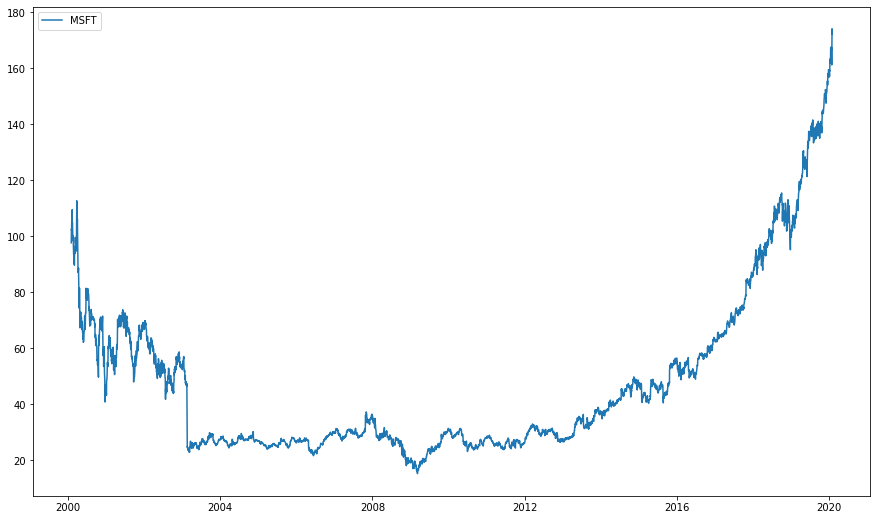

In [4]:
#plot all the data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plotstype

for symbol in dct_data:
    plt.plot('date', '1. open', data=dct_data[symbol], label=symbol)
plt.legend()
    

#### 2. Feature Engineering

Normalize data (we bring it to the same scale in the interval (0,1). 
Use the sklearn to normalize the data


In [11]:
data_normalizer = preprocessing.MinMaxScaler()
dct_data_cleaned = {symbol: data.drop('date', axis=1).drop(0, axis=0) for symbol, data in dct_data.items()}
dct_data_normalized = {symbol: data_normalizer.fit_transform(data) for symbol, data in dct_data_cleaned.items()}

#### 3. TODO: maybe regularization?

#### 4. Setup the model architecture



In [51]:
# for (symbol, data) in dct_data_cleaned.items():
#     print(data)

# for (symbol, data) in dct_data_normalized.items():
#     print(data)
    
# test = np.array([dct_data_normalized['MSFT'][0:i].copy() for i in range(10)])
# print(np.array([dct_data_normalized['MSFT'][:,0][0:i].copy() for i in range(10)]))

x = np.array([
    [[1,2],
    [2,3],
    [3,4]]
    ,
    [[4,5],
     [5,6],
     [6,7]]])
print(x.shape)
y = np.expand_dims(x, axis=-1)
print(y.shape, y)

(2, 3, 2)
(2, 3, 2, 1) [[[[1]
   [2]]

  [[2]
   [3]]

  [[3]
   [4]]]


 [[[4]
   [5]]

  [[5]
   [6]]

  [[6]
   [7]]]]
